In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importação dos pacotes.


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

Visualização e importação do arquivo.

In [158]:
path_vendas = r'/content/drive/MyDrive/projeto/Vendas.xlsx'

In [159]:
df = pd.read_excel(path_vendas)
pd.set_option('display.max_columns', None)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100999 entries, 0 to 100998
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Código Venda    100999 non-null  int64         
 1   Data            100999 non-null  datetime64[ns]
 2   ID Loja         100999 non-null  object        
 3   Produto         100999 non-null  object        
 4   Quantidade      100999 non-null  int64         
 5   Valor Unitário  100999 non-null  int64         
 6   Valor Final     100999 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.4+ MB


In [161]:
df.head()

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71


Faturamento por loja
  

                                  Valor Final
ID Loja                                      
Iguatemi Campinas                     1762419
Shopping Vila Velha                   1731167
Bourbon Shopping SP                   1726110
Rio Mar Recife                        1722766
Shopping SP Market                    1721763
Palladium Shopping Curitiba           1721120
Norte Shopping                        1711968
Ribeirão Shopping                     1707122
Iguatemi Esplanada                    1699681
Rio Mar Shopping Fortaleza            1698430
Shopping Center Leste Aricanduva      1682870
Novo Shopping Ribeirão Preto          1678225
Shopping Iguatemi Fortaleza           1674824
Center Shopping Uberlândia            1668921
Shopping União de Osasco              1663770
Shopping Barra                        1653103
Passei das Águas Shopping             1649014
Shopping Eldorado                     1648111
Salvador Shopping                     1646739
Shopping Center Interlagos        

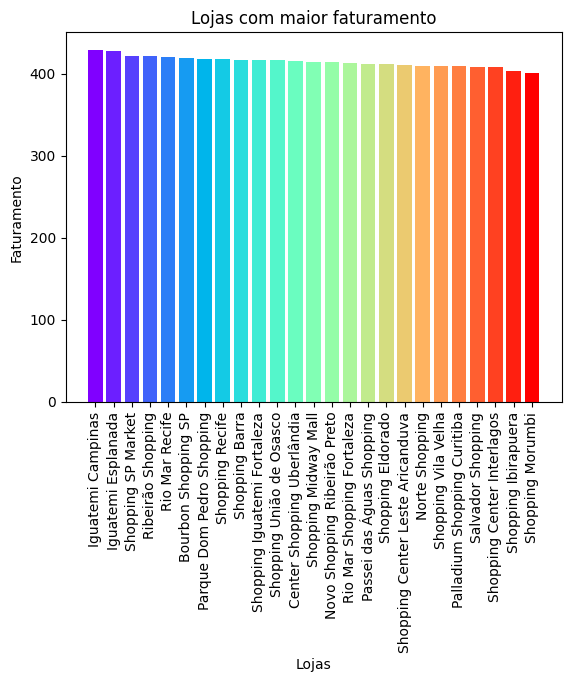

In [178]:
faturamento = df[['ID Loja', 'Valor Final']].groupby('ID Loja').sum()
faturamento = faturamento.sort_values(by=['Valor Final'], ascending=False)

faturamentoG = df[['ID Loja', 'Valor Final']].groupby('ID Loja')['Valor Final'].mean().reset_index()
faturamentoG = faturamentoG.sort_values(by=['Valor Final'], ascending=False)

num_bars = len(faturamentoG['ID Loja'])
colors = cm.rainbow(np.linspace(0, 1, num_bars))

plt.bar(faturamentoG['ID Loja'], faturamentoG['Valor Final'], color=colors)
plt.title('Lojas com maior faturamento')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.xticks(rotation=90)
print(faturamento)

Quantidades de produtos vendidos por loja

                                  Quantidade
ID Loja                                     
Shopping Vila Velha                     9224
Palladium Shopping Curitiba             9091
Norte Shopping                          9014
Shopping Center Leste Aricanduva        8938
Rio Mar Shopping Fortaleza              8937
Iguatemi Campinas                       8935
Shopping SP Market                      8927
Bourbon Shopping SP                     8863
Rio Mar Recife                          8863
Ribeirão Shopping                       8825
Novo Shopping Ribeirão Preto            8751
Shopping União de Osasco                8730
Shopping Ibirapuera                     8723
Shopping Eldorado                       8719
Salvador Shopping                       8698
Shopping Center Interlagos              8675
Shopping Barra                          8638
Shopping Iguatemi Fortaleza             8629
Center Shopping Uberlândia              8627
Passei das Águas Shopping               8618
Shopping R

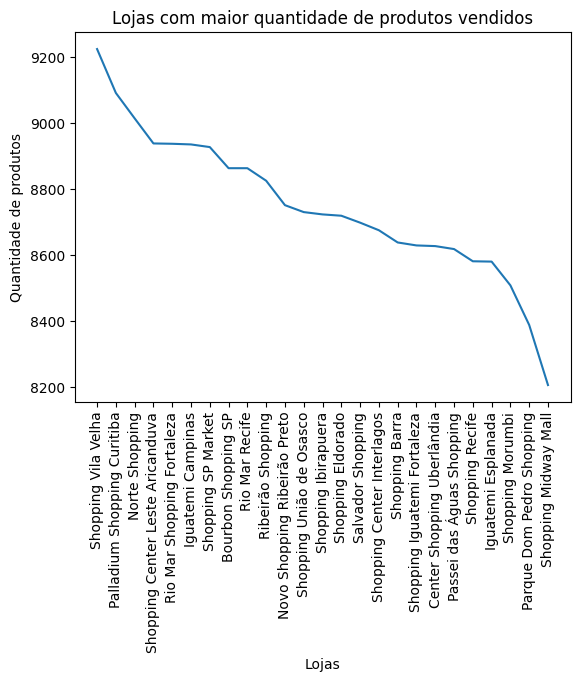

In [168]:
quantidades = df[['ID Loja', 'Quantidade']].groupby('ID Loja').sum()
quantidades = quantidades.sort_values(by=['Quantidade'], ascending=False)
print(quantidades)
quantidadesG = df[['ID Loja', 'Quantidade']].groupby('ID Loja').sum().reset_index()
quantidadesG = quantidadesG.sort_values(by=['Quantidade'], ascending=False)
plt.plot(quantidadesG['ID Loja'], quantidadesG['Quantidade'])
plt.title('Lojas com maior quantidade de produtos vendidos')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de produtos')
plt.xticks(rotation=90)
plt.show()

Ticket Médio por produto em cada loja

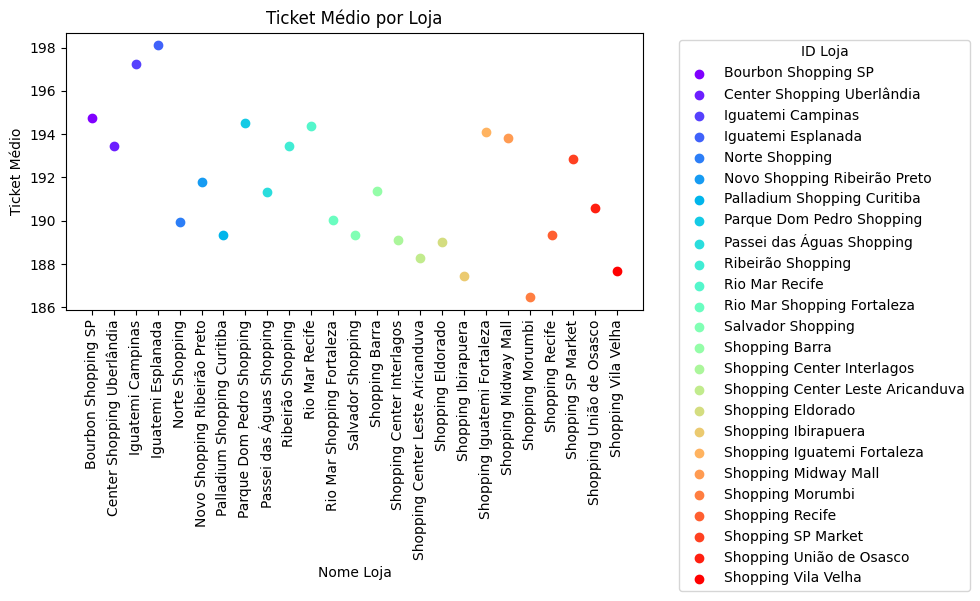

In [156]:

ticket_medio = (faturamento['Valor Final'] / quantidades['Quantidade']).to_frame()
ticket_medio = ticket_medio.rename(columns={0: 'Ticket Médio'})


unique_ids = ticket_medio.index.unique()
colors = cm.rainbow(np.linspace(0, 1, len(unique_ids)))
id_to_color = dict(zip(unique_ids, colors))

plt.figure(figsize=(10, 6))
for id_loja, ticket in ticket_medio['Ticket Médio'].items():
    plt.scatter(id_loja, ticket, color=id_to_color[id_loja], label=id_loja)

plt.title('Ticket Médio por Loja')
plt.xlabel('Nome da Loja')
plt.ylabel('Ticket Médio')
plt.xticks(rotation=90)
plt.legend(title='ID Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ***Análise de Vendas: Explorando Faturamento, Quantidade e Ticket Médio***
Este relatório apresenta uma análise visual das vendas, utilizando gráficos para explorar o faturamento, a quantidade de produtos vendidos e o ticket médio por loja. O objetivo é fornecer insights sobre o desempenho das lojas e identificar áreas de oportunidade.

**Gráfico de Faturamento:**

O gráfico de barras "Lojas com maior faturamento" exibe o faturamento médio de cada loja, ordenado de forma decrescente. As três lojas com maior faturamento são destacadas em vermelho para facilitar a identificação. Além disso, o gráfico apresenta o valor total das vendas, fornecendo uma visão geral do desempenho da empresa.

*Justificativa:* Este gráfico permite identificar as lojas com maior contribuição para o faturamento total, direcionando esforços para manter ou aprimorar seu desempenho. A visualização clara do total de vendas auxilia na compreensão do contexto geral do negócio.

**Gráfico de Quantidade de Produtos Vendidos:**

O gráfico de linhas "Lojas com maior quantidade de produtos vendidos" mostra a quantidade total de produtos vendidos por cada loja. A ordenação decrescente permite visualizar as lojas com maior volume de vendas.

*Justificativa:* Este gráfico complementa o anterior, mostrando se o alto faturamento está relacionado a um grande volume de vendas ou a um ticket médio elevado. Permite identificar lojas com alto potencial de crescimento, caso o volume de vendas seja baixo.

**Gráfico de Ticket Médio:**

O gráfico de dispersão "Ticket Médio por Loja" apresenta o ticket médio de cada loja, utilizando cores diferentes para diferenciar cada uma.

**Justificativa:** Este gráfico permite identificar lojas com alto ticket médio, o que pode indicar uma estratégia de vendas focada em produtos de maior valor agregado. Lojas com ticket médio baixo podem se beneficiar de ações para aumentar o valor das compras, como promoções de produtos complementares.

# **Possibilidades de Aprimoramento e Experiências Obtidas**


Destaque para as lojas com maior faturamento no gráfico de barras.
Informação sobre o total de vendas no título do gráfico de faturamento.
Diferenciação de cores para cada loja no gráfico de ticket médio.
**Experiências Obtidas:**

A visualização dos dados permitiu identificar as lojas com maior impacto no faturamento e na quantidade de produtos vendidos.
A análise do ticket médio revelou diferenças significativas entre as lojas, indicando a necessidade de estratégias personalizadas para cada uma.
A inclusão do total de vendas e do destaque para as lojas com maior faturamento facilitou a compreensão do contexto geral e a identificação de áreas de foco.
**Próximos Passos:**

Segmentar clientes por perfil de compra para entender melhor as necessidades de cada grupo.
Analisar a performance de produtos específicos para identificar oportunidades de otimização do mix de produtos.
Implementar dashboards interativos para permitir uma exploração mais aprofundada dos dados.
Incorporar dados externos, como informações demográficas ou de mercado, para enriquecer a análise.
# **Conclusões:**

A análise visual dos dados de vendas é fundamental para a tomada de decisões estratégicas. Os gráficos apresentados neste relatório fornecem insights valiosos sobre o desempenho das lojas, permitindo identificar áreas de oportunidade e direcionar esforços para o crescimento do negócio. A constante busca por aprimoramentos na análise e na visualização dos dados é crucial para o sucesso da empresa.

